<a href="https://colab.research.google.com/github/Dmitriy6655/Sem_03_logistic_regerssion/blob/main/Sem_03_lin_regerssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 3. Классификация на практике
Ссылка на набор данных.

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.

Создайте модель линейной регрессии, которая бы оценивала лояльность пользователей к отклику.

Пояснения к признакам набора данных:

* **AGREEMENT_RK** — уникальный идентификатор объекта в выборке;
* **TARGET** — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
* **AGE** — возраст клиента;
* **SOCSTATUS_WORK_FL** — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
* **SOCSTATUS_PENS_FL** — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
* **GENDER** — пол клиента (1 — мужчина, 0 — женщина);
* **CHILD_TOTAL** — количество детей клиента;
* **DEPENDANTS** — количество иждивенцев клиента;
* **PERSONAL_INCOME** — личный доход клиента (в рублях);
* **LOAN_NUM_TOTAL** — количество ссуд клиента;
* **LOAN_NUM_CLOSED** — количество погашенных ссуд клиента.

In [26]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
# из модуля model_selection библиотеки sklearn импортируем функцию train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data=pandas.read_csv('ClientsData.csv')

df=pd.DataFrame(data)
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [3]:
df.info()#метод обнаружения пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


Наша цель — прогноз переменной Y, т.е. согласится ли клиент на новую услугу банка.(0 — нет, 1 — да)

In [4]:
x = DataFrame(data, columns=['LOAN_NUM_TOTAL' ])
y = DataFrame(data, columns=['TARGET' ])


# Инициализация классификатора логистической регрессии
clf = LogisticRegression()
# Обучение классификатора на данных
clf.fit(x, y)
# Прогнозирование меток классов для данных
y_pred = clf.predict(x)
print(y_pred)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Исследование данных

In [5]:
fg=data['TARGET'].value_counts()
print(fg)

TARGET
0    13411
1     1812
Name: count, dtype: int64


Метод **groupby()** позволяет группировать данные по одному или нескольким столбцам и вычислять различные статистики для каждой группы.

<ipython-input-6-e84a6b5b150a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=data, palette='hls')


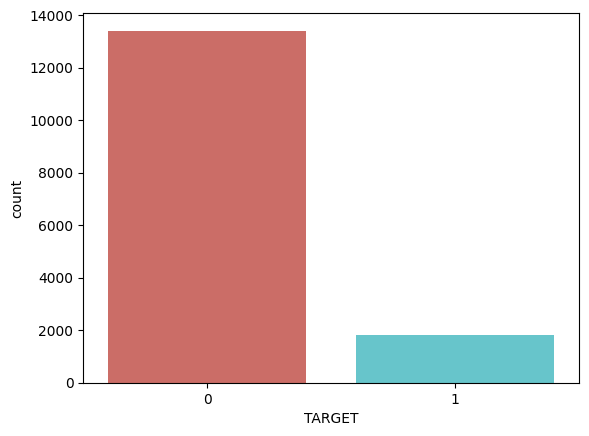

<Figure size 640x480 with 0 Axes>

In [6]:
sns.countplot(x='TARGET', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

Найдем процентное соотношение:

In [7]:
count_no_sub = len(data[data['TARGET']==0])
count_sub = len(data[data['TARGET']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("НЕТ ОТКЛИКА:", pct_of_no_sub*100, "%")
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("ПОЛОЖИТЕЛЬНЫЙ ОТКЛИК:", pct_of_sub*100, "%")

НЕТ ОТКЛИКА: 88.09695854956317 %
ПОЛОЖИТЕЛЬНЫЙ ОТКЛИК: 11.90304145043684 %


Классы наших данных не сбалансированы, а соотношение клиентов без вклада и с вкладом составляет 89 к 11. До балансировки классов проведём ещё несколько исследований:

In [8]:
data.groupby('TARGET').mean()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM
TARGET,,,,,,,,,,
0,40.849005,0.901350,0.145105,0.659906,1.095146,0.629632,13540.436161,1.397435,0.774588,0.182313
1,37.128035,0.970751,0.055740,0.614790,1.130795,0.760486,16173.378035,1.316225,0.583885,0.291943


**АНАЛИЗ:**

  * Средний возраст(AGE) клиентов кто откликнулся меньше возраста тех кто не откликнулся.
  * Количество погашенных ссуд (LOAN_NUM_CLOSED) клиента меньше у тех кто откликнулся.
  * % социального статуса клиента относительно работы с индексом 1 (SOCSTATUS_WORK_FL) выше у тех кто откликнулся.
   

Чтобы чётче представлять данные, рассчитаем категориальное среднее других категориальных переменных, таких как личный доход клиента (в рублях)(PERSONAL_INCOME)

In [9]:
data.groupby('PERSONAL_INCOME').mean()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
PERSONAL_INCOME,,,,,,,,,,
24.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1950.0,23.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2000.0,43.0,1.0,0.0,0.5,1.0,1.0,1.5,1.0,0.0,0.0
2100.0,54.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2300.0,49.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
150000.0,25.0,1.0,0.0,0.5,1.0,1.5,1.0,0.5,0.0,0.5
160000.0,52.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
170000.0,56.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


Text(0, 0.5, 'Частота согласия с предлож. банка')

<Figure size 2000x1200 with 0 Axes>

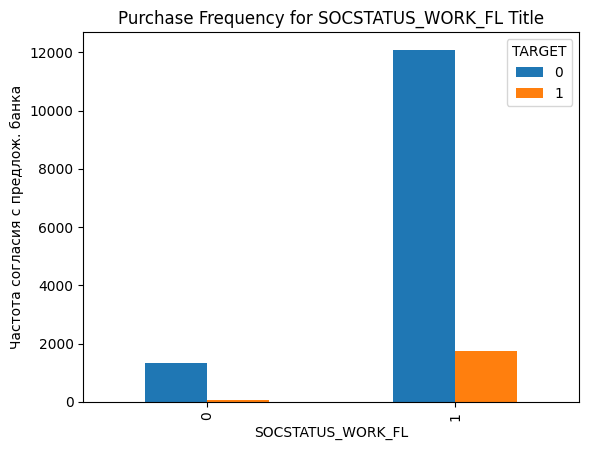

In [33]:
%matplotlib inline
plt.figure(figsize=(20,12))
# pd.crosstab(data.LOAN_NUM_CLOSED,data.TARGET).plot(kind='bar')
pd.crosstab(data.SOCSTATUS_WORK_FL,data.TARGET).plot(kind='bar')


# DEPENDANTS
plt.title('Purchase Frequency for SOCSTATUS_WORK_FL Title')
# plt.xlabel('---')
plt.ylabel('Частота согласия с предлож. банка')
# plt.savefig('purchase_fre_job')


Люди, которые работают, чаще соглашались с предложением банка.

Text(0, 0.5, 'Частота согласия с предлож. банка')

<Figure size 2000x1200 with 0 Axes>

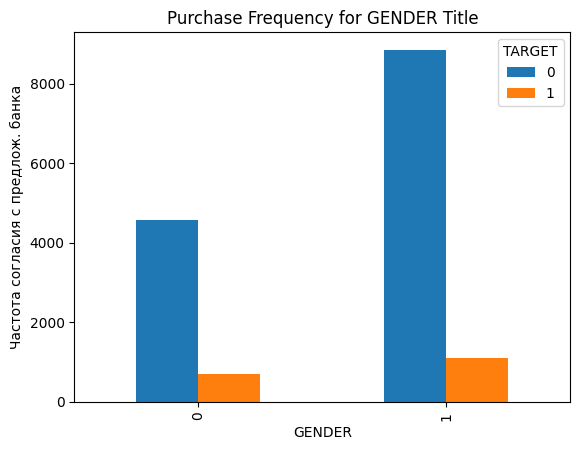

In [36]:
%matplotlib inline
plt.figure(figsize=(20,12))
# pd.crosstab(data.LOAN_NUM_CLOSED,data.TARGET).plot(kind='bar')
pd.crosstab(data.GENDER,data.TARGET).plot(kind='bar')


# DEPENDANTS
plt.title('Purchase Frequency for GENDER Title')
# plt.xlabel('---')
plt.ylabel('Частота согласия с предлож. банка')
# plt.savefig('purchase_fre_job')

Мужчины чаще соглашались с предложением.

Text(0, 0.5, 'Частота согласия с предлож. банка')

<Figure size 2000x1200 with 0 Axes>

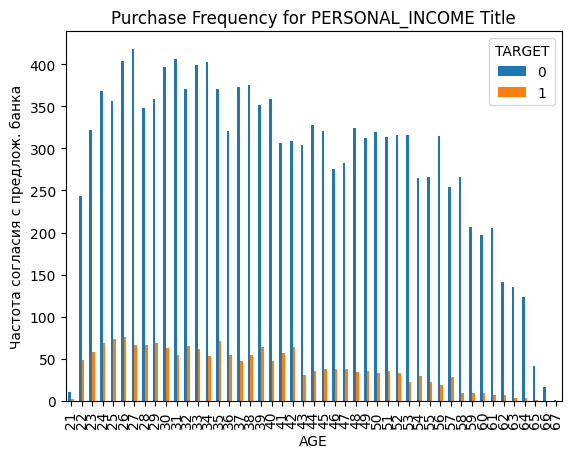

In [12]:
%matplotlib inline
plt.figure(figsize=(20,12))
# pd.crosstab(data.LOAN_NUM_CLOSED,data.TARGET).plot(kind='bar')
pd.crosstab(data.AGE,data.TARGET).plot(kind='bar')


# DEPENDANTS
plt.title('Purchase Frequency for PERSONAL_INCOME Title')
# plt.xlabel('---')
plt.ylabel('Частота согласия с предлож. банка')
# plt.savefig('purchase_fre_job')

Возраст сильным фактором прогнозирования не выглядит.

In [35]:
# функция для вывода процентов по значениям признаков
def print_percentage(df,par_list):
    for par in par_list:
        print(df[par].value_counts())
        t_0, t_1 = df[par].value_counts()
        print('0: ',round((t_0 / (t_1 + t_0) * 100),2), '%')
        print('1: ',round(t_1 / (t_0 + t_1) * 100, 2), '%')
        print("-"*100)
list_parameters = ['GENDER', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'TARGET']
print_percentage(data, list_parameters)

GENDER
1    9964
0    5259
Name: count, dtype: int64
0:  65.45 %
1:  34.55 %
----------------------------------------------------------------------------------------------------
SOCSTATUS_WORK_FL
1    13847
0     1376
Name: count, dtype: int64
0:  90.96 %
1:  9.04 %
----------------------------------------------------------------------------------------------------
SOCSTATUS_PENS_FL
0    13176
1     2047
Name: count, dtype: int64
0:  86.55 %
1:  13.45 %
----------------------------------------------------------------------------------------------------
TARGET
0    13411
1     1812
Name: count, dtype: int64
0:  88.1 %
1:  11.9 %
----------------------------------------------------------------------------------------------------


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Модель с взвешиванием классов
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train_scaled, y_train)

# Предсказания и оценка
y_pred_weighted = model_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)

# 2. Ресемплирование данных: увеличение класса "Отклик"
X_train_resampled, y_train_resampled = resample(X_train[y_train == 1],
                                                y_train[y_train == 1],
                                                replace=True,
                                                n_samples=X_train[y_train == 0].shape[0],
                                                random_state=42)

# Соединение ресемплированных и исходных данных класса 0
X_train_balanced = pd.concat([X_train[y_train == 0], X_train_resampled])
y_train_balanced = pd.concat([y_train[y_train == 0], y_train_resampled])

# Масштабирование ресемплированных данных
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

# Обучение модели на сбалансированных данных
model_resampled = LogisticRegression()
model_resampled.fit(X_train_balanced_scaled, y_train_balanced)

# Предсказания и оценка
y_pred_resampled = model_resampled.predict(X_test_scaled)
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
class_report_resampled = classification_report(y_test, y_pred_resampled)

# функция для вывода результатов
def print_results(model_name, accuracy, conf_matrix, class_report):
    print(f"\nМодель: {model_name}")
    print(f"Точность: {accuracy:.4f}")
    print("Матрица ошибок:")
    print(conf_matrix)
    print("\nОтчет по классификации:")
    print(class_report)

# Вывод результатов для обеих моделей
print_results("Взвешенная логистическая регрессия", accuracy_weighted, conf_matrix_weighted, class_report_weighted)
print_results("Логистическая регрессия с ресемплированием", accuracy_resampled, conf_matrix_resampled, class_report_resampled)


Модель: Взвешенная логистическая регрессия
Точность: 0.5868
Матрица ошибок:
[[2321 1691]
 [ 196  359]]

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      4012
           1       0.18      0.65      0.28       555

    accuracy                           0.59      4567
   macro avg       0.55      0.61      0.49      4567
weighted avg       0.83      0.59      0.66      4567


Модель: Логистическая регрессия с ресемплированием
Точность: 0.5207
Матрица ошибок:
[[1970 2042]
 [ 147  408]]

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.93      0.49      0.64      4012
           1       0.17      0.74      0.27       555

    accuracy                           0.52      4567
   macro avg       0.55      0.61      0.46      4567
weighted avg       0.84      0.52      0.60      4567



Вывод:

Взвешенная модель имеет лучшую точность (58.68%) по сравнению с моделью с ресемплированием (52.07%), но страдает от низкого precision для откликов.
Ресемплирование дало лучший результат по полноте откликов (74%), но значительно увеличило количество ложных срабатываний.